# MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Ana/Desktop/DATA_SCIENCE_FOR_BUSINESS/PYTHON_DATA_SCIENCE_MASTERY/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS_/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [5]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [6]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': [solver],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [7]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,0.06,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,-1,l1,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.87,0.87,0.00,1
13,0.06,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,-1,l1,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.87,0.87,0.00,2
19,0.05,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.87,0.87,0.00,3
15,0.06,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.87,0.87,0.00,4
11,0.09,0.03,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.50,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.87,0.87,0.00,4
7,0.06,0.01,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.25,-1,none,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.88,0.87,0.87,0.87,0.00,6
9,0.06,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.50,-1,l1,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.87,0.87,0.87,0.87,0.00,7
18,0.05,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",1,-1,l2,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.87,0.87,0.87,0.87,0.00,8
14,0.04,0.00,0.01,0.00,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.75,-1,l2,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.87,0.87,0.87,0.87,0.00,9
5,0.07,0.02,0.01,0.01,"LogisticRegression(C=1, n_jobs=-1, penalty='l1...",0.25,-1,l1,saga,"{'algoritmo': LogisticRegression(C=1, n_jobs=-...",0.87,0.87,0.87,0.87,0.00,10


####  Con random search

In [8]:
#random_search = RandomizedSearchCV(estimator = pipe,
#                                   param_distributions = grid, 
#                                   n_iter = 5, 
#                                   cv = 3, 
#                                   scoring = 'roc_auc', 
#                                   verbose = 0,
#                                   n_jobs = -1)
#
#modelo = random_search.fit(train_x,train_y)

#pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__verbosity,param_algoritmo__reg_lambda,param_algoritmo__reg_alpha,param_algoritmo__n_jobs,param_algoritmo__n_estimators,param_algoritmo__max_depth,...,param_algoritmo__min_samples_leaf,param_algoritmo__max_iter,param_algoritmo__l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,1.09,0.01,0.04,0.01,0,0.01,1,-1,100,5,...,NaN,NaN,NaN,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.79,0.78,0.81,0.79,0.01,1
0,9.82,0.22,0.20,0.03,0,0.10,1,-1,500,10,...,NaN,NaN,NaN,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.79,0.78,0.80,0.79,0.01,2
4,1.54,0.02,0.13,0.01,NaN,NaN,NaN,NaN,NaN,20,...,500,200,0.75,"{'algoritmo__scoring': 'roc_auc', 'algoritmo__...",0.78,0.77,0.79,0.78,0.01,3
2,3.24,0.14,0.07,0.00,0,0.10,0.10,-1,100,20,...,NaN,NaN,NaN,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.77,0.76,0.80,0.78,0.01,4
3,0.96,0.14,0.11,0.04,NaN,NaN,NaN,NaN,NaN,5,...,500,100,0.75,"{'algoritmo__scoring': 'roc_auc', 'algoritmo__...",0.78,0.77,0.78,0.78,0.01,5


## EVALUAR

### Predecir sobre validación

In [8]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [9]:
roc_auc_score(val_y, pred)

0.8613608254850085

### Examinar el mejor modelo

In [10]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 LogisticRegression(C=1, n_jobs=-1, penalty='l1',
                                    solver='saga'))])

In [18]:
modelo.best_estimator_.named_steps.algoritmo.coef_

array([[ 4.28856055,  7.55647026,  1.12000805,  1.15081566, -2.51039868,
         2.22266114,  0.70074199, -0.51300846, -1.69238041, -0.8940367 ,
        -0.81634931,  2.24781237, -0.46740624, -0.39696495,  0.        ,
        -0.11969495,  0.09870495]])

In [19]:
modelo.best_estimator_.named_steps.algoritmo.feature_names_in_

array(['tiempo_en_site_total_mms', 'score_actividad_mms',
       'ult_actividad_SMS Sent', 'score_perfil_mms',
       'paginas_vistas_visita_mms', 'ocupacion_Working Professional',
       'visitas_total_mms', 'ambito_Select',
       'ult_actividad_Converted to Lead',
       'ult_actividad_Chat Conversation',
       'ult_actividad_Page Visited on Website', 'origen_Lead Add Form',
       'fuente_Direct Traffic', 'ocupacion_Unemployed',
       'ambito_Marketing Management', 'ambito_Finance Management',
       'descarga_lm_No'], dtype=object)

In [22]:
pd.DataFrame(data = modelo.best_estimator_.named_steps.algoritmo.coef_,
            columns = modelo.best_estimator_.named_steps.algoritmo.feature_names_in_).unstack()\
    .sort_values(ascending = False)

score_actividad_mms                    0    7.56
tiempo_en_site_total_mms               0    4.29
origen_Lead Add Form                   0    2.25
ocupacion_Working Professional         0    2.22
score_perfil_mms                       0    1.15
ult_actividad_SMS Sent                 0    1.12
visitas_total_mms                      0    0.70
descarga_lm_No                         0    0.10
ambito_Marketing Management            0    0.00
ambito_Finance Management              0   -0.12
ocupacion_Unemployed                   0   -0.40
fuente_Direct Traffic                  0   -0.47
ambito_Select                          0   -0.51
ult_actividad_Page Visited on Website  0   -0.82
ult_actividad_Chat Conversation        0   -0.89
ult_actividad_Converted to Lead        0   -1.69
paginas_vistas_visita_mms              0   -2.51
dtype: float64

En estos resultados no importa el signo + o -

**Variables mas predictivas:**

- score_actividad_mms
- tiempo_en_site_total_mms
- paginas_vistas_visita_mms: a menos paginas vistas por visita mas conversion, lo cual es algo extraño, suele pasar por meter varibales que CORRELACIONAN(habría que revisarlo); AUN ASI, ESTA PREDICIENDO

## REPORTING DEL MODELO

### Gain Chart

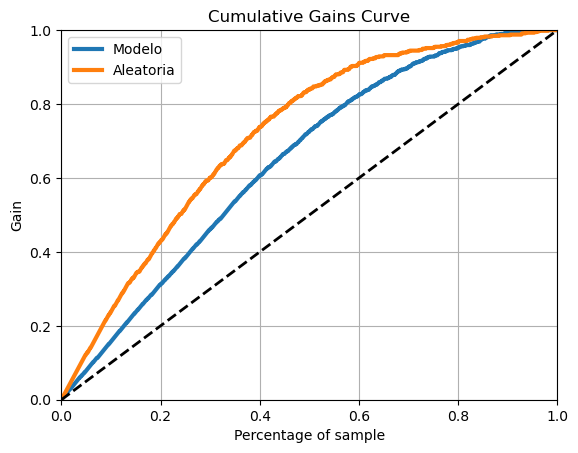

In [14]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
#del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

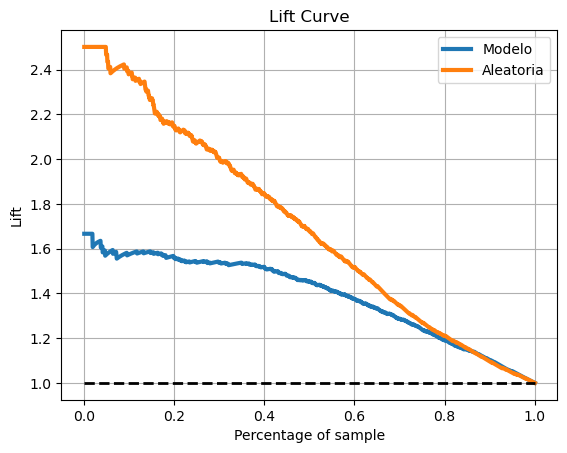

In [16]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
#del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

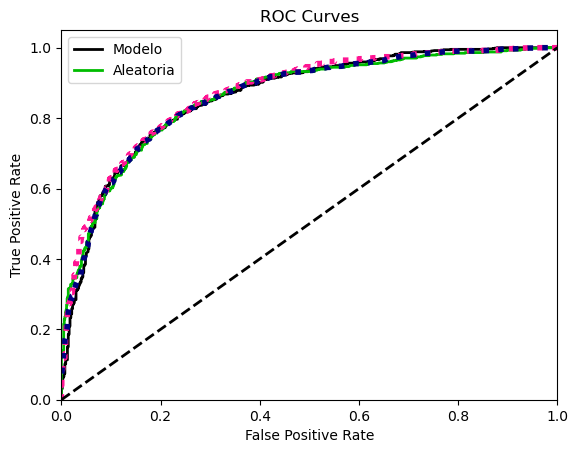

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
#del ax.lines[0]                 
#del ax.lines[1] 
#del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);